In [50]:
import numpy as np # Biblioteca para manipulação de matrizes
import pandas as pd # Biblioteca para manipulação de datasets
import cv2 # Biblioteca para visão computacional
import os # Biblioteca do Sistema Operacional
import matplotlib.pyplot as plt # Biblioteca pra visualização de dados
import seaborn as sns # Biblioteca pra visualização de dados
% matplotlib inline

import time
start_time = time.time()

In [2]:
img_folder_path  = '/content/drive/My Drive/Colab Notebooks/TCC/PH2/Dataset/PH2_Separado/IMD/'
mask_folder_path = '/content/drive/My Drive/Colab Notebooks/TCC/PH2/Dataset/PH2_Separado/lesion/'
img  = os.listdir(img_folder_path) # Pasta das imagens COLORIDAS

mask = []                             # Essa parte foi feita, para ajudar a ordem das máscaras
for i in range(0,len(img)):           # para bater corretamente com sua respectiva imagem da
  IMD = img[i]                        # lesão. Ao final, maks será conterá o caminho da Pasta 
  IMD = IMD[0:6]                      # de Máscara
  Anex = IMD + '_lesion.bmp'
  mask.append(Anex)


print(img)
print(mask)

['IMD002.bmp', 'IMD003.bmp', 'IMD016.bmp', 'IMD018.bmp', 'IMD008.bmp', 'IMD017.bmp', 'IMD019.bmp', 'IMD010.bmp', 'IMD015.bmp', 'IMD014.bmp', 'IMD013.bmp', 'IMD006.bmp', 'IMD004.bmp', 'IMD020.bmp', 'IMD009.bmp', 'IMD038.bmp', 'IMD023.bmp', 'IMD035.bmp', 'IMD024.bmp', 'IMD027.bmp', 'IMD036.bmp', 'IMD022.bmp', 'IMD033.bmp', 'IMD037.bmp', 'IMD021.bmp', 'IMD025.bmp', 'IMD030.bmp', 'IMD032.bmp', 'IMD031.bmp', 'IMD040.bmp', 'IMD049.bmp', 'IMD039.bmp', 'IMD044.bmp', 'IMD043.bmp', 'IMD048.bmp', 'IMD057.bmp', 'IMD045.bmp', 'IMD061.bmp', 'IMD047.bmp', 'IMD058.bmp', 'IMD042.bmp', 'IMD050.bmp', 'IMD041.bmp', 'IMD090.bmp', 'IMD075.bmp', 'IMD080.bmp', 'IMD088.bmp', 'IMD065.bmp', 'IMD085.bmp', 'IMD078.bmp', 'IMD076.bmp', 'IMD064.bmp', 'IMD063.bmp', 'IMD091.bmp', 'IMD125.bmp', 'IMD103.bmp', 'IMD108.bmp', 'IMD112.bmp', 'IMD120.bmp', 'IMD101.bmp', 'IMD105.bmp', 'IMD133.bmp', 'IMD134.bmp', 'IMD132.bmp', 'IMD118.bmp', 'IMD092.bmp', 'IMD126.bmp', 'IMD107.bmp', 'IMD147.bmp', 'IMD140.bmp', 'IMD142.bmp', 'IMD1

In [3]:
# Para essa etapa de introdução, vamos gerar um índice aleatório para escolher qualquer imagem do
# nosso Dataset
ind = np.random.randint(1,200)
img = img[ind]
mask = mask[ind]
print(img)
print(mask)

IMD160.bmp
IMD160_lesion.bmp


Text(0.5, 1.0, 'Imagem Binarizada')

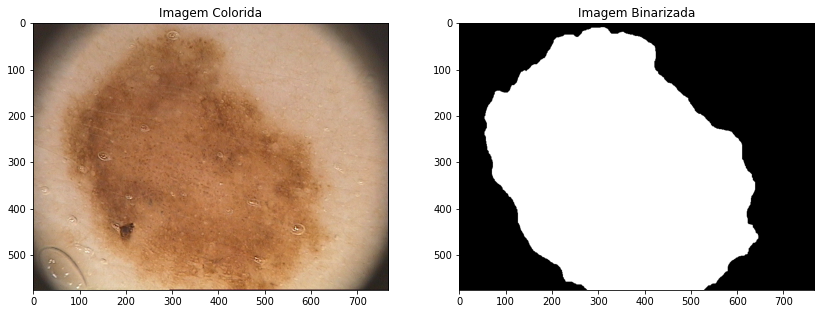

In [4]:
# Carregando da imagem colorida

img_color_BGR = cv2.imread(img_folder_path + img)
img_gray = cv2.cvtColor(img_color_BGR, cv2.COLOR_BGR2GRAY)
img_color_RGB = cv2.cvtColor(img_color_BGR, cv2.COLOR_BGR2RGB)
mask_bin = cv2.imread(mask_folder_path + mask,0)

# Visualizando as imagens
plt.rcParams['figure.figsize'] = (14, 7) # Formata o comprimento e altura total do plot

# Plotagem da imagem colorida
plt.subplot(1, 2, 1)
plt.imshow(img_color_RGB)
plt.title('Imagem Colorida')

# Plotagem da imagem em escala cinza
#plt.subplot(1, 3, 2)
#plt.imshow(img_gray, cmap='gray')
#plt.title('Imagem em Cinza')

# Plotagem da máscara binarizada
plt.subplot(1, 2, 2)
plt.imshow(mask_bin, cmap='gray')
plt.title('Imagem Binarizada')

Text(0.5, 1.0, 'Imagem Colorida')

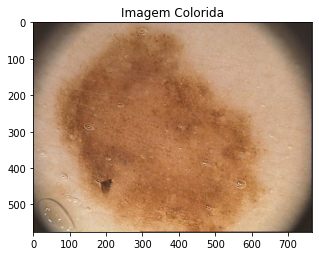

In [5]:
# Carregando da imagem colorida

img_color_BGR = cv2.imread(img_folder_path + img)
img_gray = cv2.cvtColor(img_color_BGR, cv2.COLOR_BGR2GRAY)
img_color_RGB = cv2.cvtColor(img_color_BGR, cv2.COLOR_BGR2RGB)
mask_bin = cv2.imread(mask_folder_path + mask,0)
img_1 = img_color_RGB
img_2 = img_color_RGB
img_3 = img_color_RGB

# Visualizando as imagens
plt.rcParams['figure.figsize'] = (5, 5) # Formata o comprimento e altura total do plot

# Plotagem da imagem colorida
plt.imshow(img_1)
plt.title( 'Imagem Colorida')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, '% da Amostra')

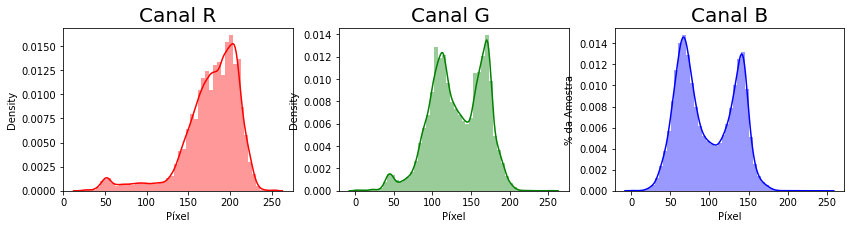

In [6]:
# Analisando o histograma das imagens, sem aplicar a máscara de região de interesse.

# Visualizando as imagens
plt.rcParams['figure.figsize'] = (14, 3) # Formata o comprimento e altura total do plot

# Plotagem do histograma do canal Vermelho
plt.subplot(1, 3, 1)
ax = sns.distplot(img_color_RGB[:,:,0], color='r')
plt.title('Canal R', fontsize = 20)
plt.xlabel('Píxel')


# Plotagem do histograma do canal Verde
plt.subplot(1, 3, 2)
ax = sns.distplot(img_color_RGB[:,:,1],color='g')
plt.title('Canal G ', fontsize = 20)
plt.xlabel('Píxel')

# Plotagem do histograma do canal Azul
plt.subplot(1, 3, 3)
ax = sns.distplot(img_color_RGB[:,:,2],color='b')
plt.title('Canal B', fontsize = 20)
plt.xlabel('Píxel')
plt.ylabel('% da Amostra')

In [7]:
# Vamos agora descobrir, qual é o valor que mais aparece em cada canal

# Calculando os valores de pico de cada histograma
red   = cv2.calcHist([img_color_RGB],channels=[0],mask=None,histSize=[256],ranges=[0,256])
green = cv2.calcHist([img_color_RGB],channels=[1],mask=None,histSize=[256],ranges=[0,256])
blue  = cv2.calcHist([img_color_RGB],channels=[2],mask=None,histSize=[256],ranges=[0,256])

print('O pico do Canal R acontece no valor de Píxel igual a {}'.format(red.argmax()))
print('O pico do Canal G acontece no valor de Píxel igual a {}'.format(green.argmax()))
print('O pico do Canal B acontece no valor de Píxel igual a {}'.format(blue.argmax()))

O pico do Canal R acontece no valor de Píxel igual a 205
O pico do Canal G acontece no valor de Píxel igual a 171
O pico do Canal B acontece no valor de Píxel igual a 69


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(0.0, 256.0)

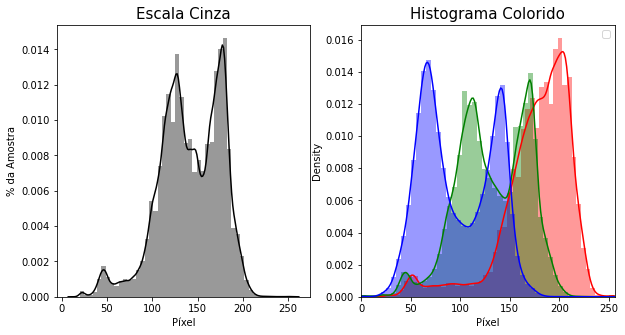

In [8]:
# Analisando o histograma das imagens cinza e binarizada

# Visualizando as imagens
plt.rcParams['figure.figsize'] = (10, 5) # Formata o comprimento e altura total do plot

# Plotagem do histograma da imagem Cinza
plt.subplot(1,2,1)
ax = sns.distplot(img_gray, color='black')
plt.title('Escala Cinza', fontsize = 15)
plt.xlabel('Píxel')
plt.ylabel('% da Amostra')



# Plotagem do histograma do Canal RGB
plt.subplot(1,2,2)
color = ('R','G','B')
sns.distplot(img_color_RGB[:,:,0],color='r',hist=True)
sns.distplot(img_color_RGB[:,:,1],color='g',hist=True)
sns.distplot(img_color_RGB[:,:,2],color='b',hist=True)
plt.legend()
plt.title('Histograma Colorido', fontsize=15)
plt.xlabel('Píxel')
plt.xlim([0,256])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, '% da Amostra')

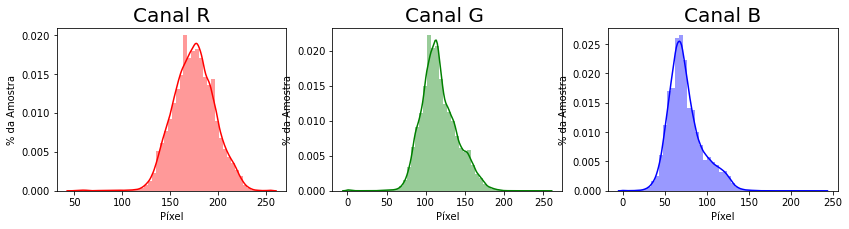

In [9]:
# Analisando agora o histograma, utilizando a máscara para delimitar a região de interesse

h = img_color_RGB.shape[0]
w = img_color_RGB.shape[1]
r = []
b = []
g = []
for i in range(0,h):
  for j in range(0,w):
    if mask_bin[i,j] == 255:
      r.append(img_color_RGB[i,j,0])
      g.append(img_color_RGB[i,j,1])
      b.append(img_color_RGB[i,j,2])

# Visualizando as imagens
plt.rcParams['figure.figsize'] = (14, 3) # Formata o comprimento e altura total do plot

# Plotagem do histograma do canal Vermelho
plt.subplot(1, 3, 1)
ax = sns.distplot(r, color='r')
plt.title('Canal R', fontsize = 20)
plt.xlabel('Píxel')
plt.ylabel('% da Amostra')


# Plotagem do histograma do canal Verde
plt.subplot(1, 3, 2)
ax = sns.distplot(g,color='g')
plt.title('Canal G ', fontsize = 20)
plt.xlabel('Píxel')
plt.ylabel('% da Amostra')

# Plotagem do histograma do canal Azul
plt.subplot(1, 3, 3)
ax = sns.distplot(b,color='b')
plt.title('Canal B', fontsize = 20)
plt.xlabel('Píxel')
plt.ylabel('% da Amostra')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(0.0, 256.0)

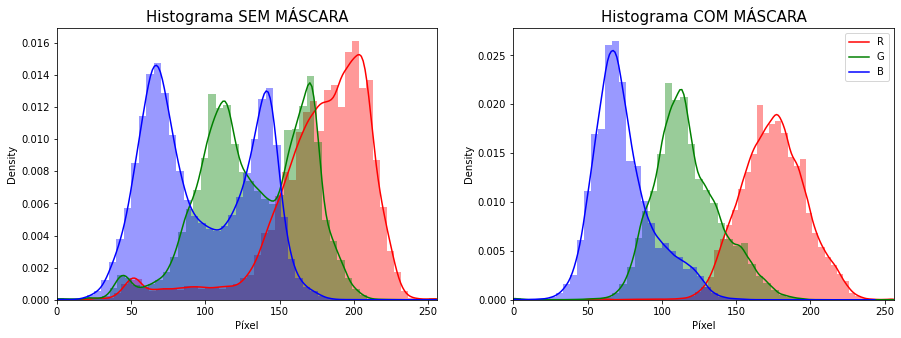

In [10]:
# Analisando a diferença entre os Histogramas, utilizando a máscara e não utilizando

# Visualizando as imagens
plt.rcParams['figure.figsize'] = (15, 5) # Formata o comprimento e altura total do plot

# Plotagem do histograma SEM MÁSCARA0
plt.subplot(1,2,1)
color = ('R','G','B')
sns.distplot(img_color_RGB[:,:,0],color='r',hist=True)
sns.distplot(img_color_RGB[:,:,1],color='g',hist=True)
sns.distplot(img_color_RGB[:,:,2],color='b',hist=True)
plt.title('Histograma SEM MÁSCARA', fontsize=15)
plt.xlabel('Píxel')
plt.xlim([0,256])


# Plotagem do histograma COM MÁSCARAo Canal RGB
plt.subplot(1,2,2)
color = ('R','G','B')
sns.distplot(r,color='r',hist=True)
sns.distplot(g,color='g',hist=True)
sns.distplot(b,color='b',hist=True)
plt.legend(['R','G','B'])
plt.title('Histograma COM MÁSCARA', fontsize=15)
plt.xlabel('Píxel')
plt.xlim([0,256])


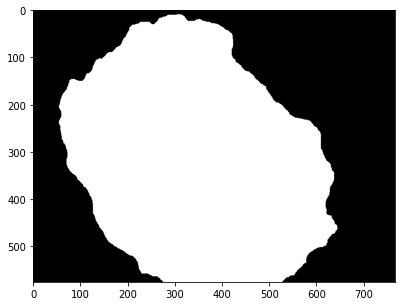

In [11]:
# Calculando as propriedades geométricas importante da máscara
# Visualização da máscara
ret, th1 = cv2.threshold(mask_bin,127,255,0) # A imagem já estava binarizada, porém foi feito este
plt.imshow(th1,cmap='gray')                  # ajuste, para pois a imagem não estava na configuração
                                             # ideal de U32DC

In [12]:
import math
pi = math.pi

In [13]:
# Cálculo do centro de massa da máscara
contours,hierarchy = cv2.findContours(th1, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
M_ind = ['M00', 'M10', 'M01', 'M20', 'M11', 'M02', 'M30', 'M21', 'M12', 'M03',
         'Mu20', 'Mu11', 'Mu02', 'Mu30', 'Mu21', 'Mu12', 'Mu03', 'Nu20',  'Nu11',
         'Nu02',  'Nu30', 'Nu21','Nu12', 'Nu03']

print('As informações dos momentos:')
print('M00 : {}'.format(M['m00']))
print('M10 : {}'.format(M['m10']))
print('M01 : {}'.format(M['m01']))
height, width = th1.shape[:2]

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print('As coordenadas de centro de massa da imagem é CM = ({},{})'.format(cx,cy)) # Centro de Massa

As informações dos momentos:
M00 : 236545.0
M10 : 81406746.66666666
M01 : 74644460.16666666
As coordenadas de centro de massa da imagem é CM = (344,315)


In [14]:
len(cnt)

597

In [15]:
len(cnt)

597

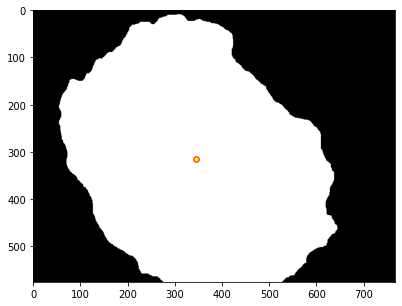

In [16]:
#Visualização do centro de massa na imagem
fig = plt.figure()
fig.clear()
plot = fig.add_subplot(111)
plot.imshow(th1, 'gray')
plot.scatter(cx, cy, s=30, c='yellow', edgecolors='red')

In [17]:
# Calculando as propriedades geométricas utilizando cv2 e os píxels da imagem
area_cv = cv2.contourArea(cnt)
perimeter_cv = cv2.arcLength(cnt,True)
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
x = int(x)
CGx = x
y = int(y)
CGy = y
raio = int(radius)
raio_max = raio
print('As coordenadas do centro da circunferência criada é CG = ({},{})'.format(x,y)) # Centro Geométrico
print('Dados importantes utilizando CV2:')
print('Raio: {} pixels'.format(raio))
print('Perímetro: {} pixels'.format(perimeter_cv))
print('Área: {} pixels*pixels'.format(area_cv))


# Calculando os valores agora, supondo que a lesão fosse perfeitamente circular
r_prox = int(math.sqrt(area_cv/pi))
area_prox = pi*(r_prox**2)

print('Se fosse um círculo, teria raio aproximadamente {} pixels e {} pixels*pixels.'.format(r_prox,area_prox))


As coordenadas do centro da circunferência criada é CG = (358,309)
Dados importantes utilizando CV2:
Raio: 324 pixels
Perímetro: 2014.0672252178192 pixels
Área: 236545.0 pixels*pixels
Se fosse um círculo, teria raio aproximadamente 274 pixels e 235858.2100609073 pixels*pixels.


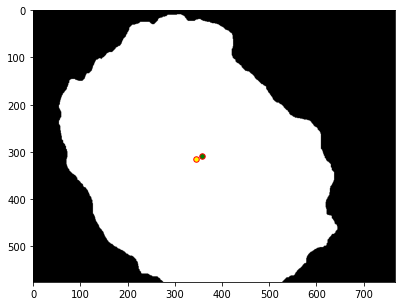

In [18]:
# Analisando a diferença entre o GM e GC
fig = plt.figure()
fig.clear()
plot = fig.add_subplot(111)
plot.imshow(th1, 'gray')
plot.scatter(cx, cy, s=30, c='yellow', edgecolors='red')
plot.scatter(x, y, s=30, c='green', edgecolors='red')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


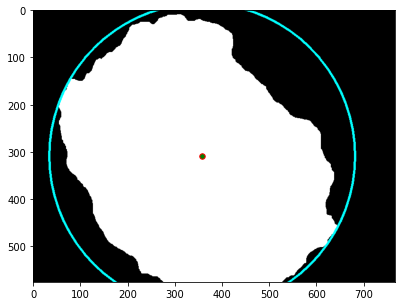

In [19]:
# Fazendo a visualização da relação da máscara com o raio
fig = plt.figure()
fig.clear()
plot = fig.add_subplot(111)
h, w = th1.shape
c = 3
# Criando uma matriz para poder plotar a imagem nos 3 canais de cores
color = np.zeros((h,w,c))
color[:,:,0] = th1
color[:,:,1] = th1
color[:,:,2] = th1
color = cv2.circle(color,(x,y),raio,color=(0,255,255),thickness=4)
plot.imshow(color)
plt.scatter(x, y, s=30, c='green', edgecolors='red')

In [20]:
# Calculando a assimetria em X e Y
simetriq1 = np.zeros((h,w,c))
simetriq2 = np.zeros((h,w,c))
simetriq3 = np.zeros((h,w,c))
simetriq4 = np.zeros((h,w,c))
X_left, X_right = np.zeros((h,w,c)), np.zeros((h,w,c))
Y_up, Y_down = np.zeros((h,w,c)), np.zeros((h,w,c))
sumq1, sumq2, sumq3, sumq4 = 0,0,0,0
for i in range(0,h): # Imagem NXM -> i = N, j = M
  for j in range(0,w):
    if mask_bin[i,j] == 255:
      if j < cx:
        if i < cy: # Segundo Quadrante
          sumq1 += 1
          simetriq1[i,j,0] = 255
          simetriq1[i,j,1] = 255
          Y_up[i,j,0], X_left[i,j,0] = 255, 255
        else:
          sumq3 += 1 # Terceiro Quadrante
          simetriq3[i,j,1] = 255
          Y_down[i,j,1], X_left[i,j,0] = 255, 255
      else:
        if i < cy:
          sumq2 += 1 # Primeiro Quadrante
          simetriq2[i,j,0] = 255
          Y_up[i,j,0], X_right[i,j,1] = 255, 255
        else:
          sumq4 += 1 # Quarto Quadrante
          simetriq4[i,j,2] = 255
          Y_down[i,j,1], X_right[i,j,1] = 255, 255

assymx = np.absolute(sumq1+sumq3 - (sumq2+sumq4))
assymy = np.absolute(sumq1+sumq2 - (sumq3+sumq4))

simetri_full = simetriq1 + simetriq2 + simetriq3 + simetriq4
simetrix = X_left + X_right
simetriy = Y_up + Y_down

print('A assimetria em X é {} pixels' .format(assymx))
print('A assimetrai em Y é {} pixels'.format(assymy))

A assimetria em X é 3630 pixels
A assimetrai em Y é 4344 pixels


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Análise da simetria em X')

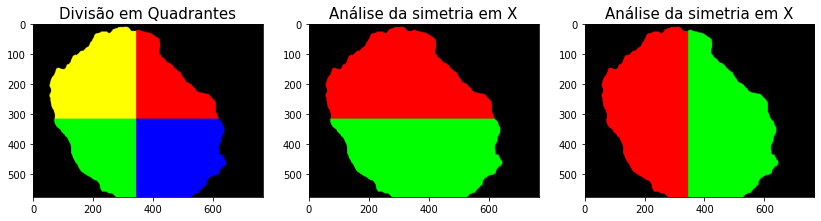

In [51]:
# Visualizando as imagens
plt.rcParams['figure.figsize'] = (14, 7) # Formata o comprimento e altura total do plot

plt.subplot(1,3,1)
plt.imshow(simetri_full)
plt.title('Divisão em Quadrantes', fontsize=15)


plt.subplot(1,3,2)
plt.imshow(simetriy)
plt.title('Análise da simetria em X', fontsize=15)


plt.subplot(1,3,3)
plt.imshow(simetrix)
plt.title('Análise da simetria em X', fontsize=15)

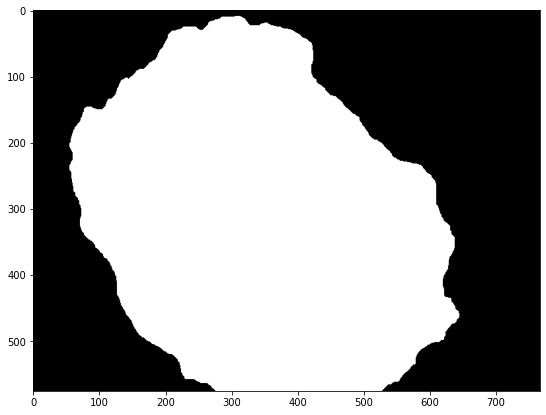

In [22]:
plt.imshow(mask_bin,cmap='gray')

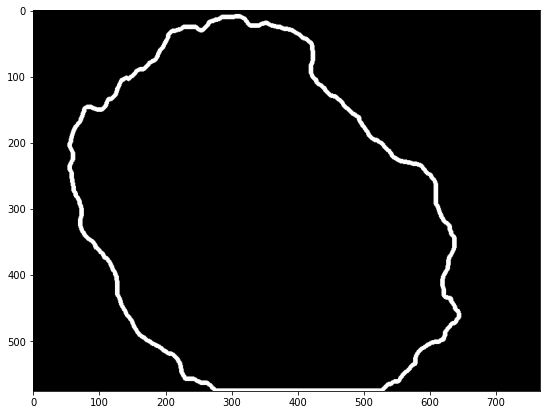

In [23]:
black = np.zeros((h,w,3),np.uint8)
ret, th1 = cv2.threshold(mask_bin,127,255,0)
contours, hierarchy = cv2.findContours(th1, 1, 2)
contorno = cv2.drawContours(black, contours, -1, (255,255,255), 6)
plt.imshow(contorno,cmap='gray')

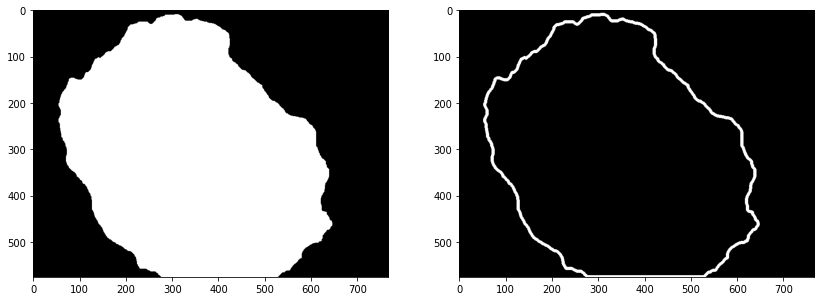

In [24]:
plt.subplot(1,2,1)
plt.imshow(mask_bin,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(contorno,cmap='gray')

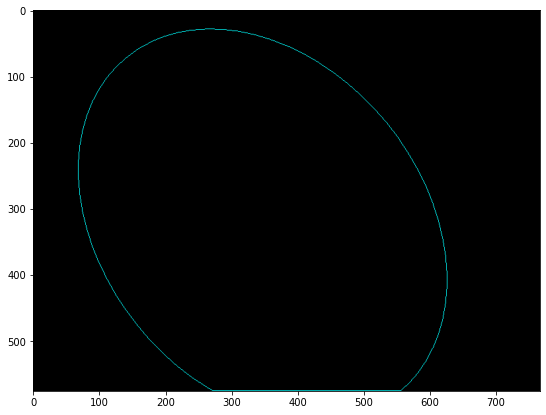

In [25]:
black = np.zeros((h,w,3), np.uint8)
cnt = contours[0]
ellipse_stats = cv2.fitEllipse(cnt)
ellipse = cv2.ellipse(black,ellipse_stats,(255,255,255),-1)
ellipse = cv2.cvtColor(ellipse,cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(ellipse,127,255,0)
contours, hierarchy = cv2.findContours(th1, 1, 2)
black = np.zeros((h,w,3),np.uint8)
ellipse = cv2.drawContours(black, contours, -1, (0,255,255), 0)
plt.imshow(ellipse,cmap='gray')

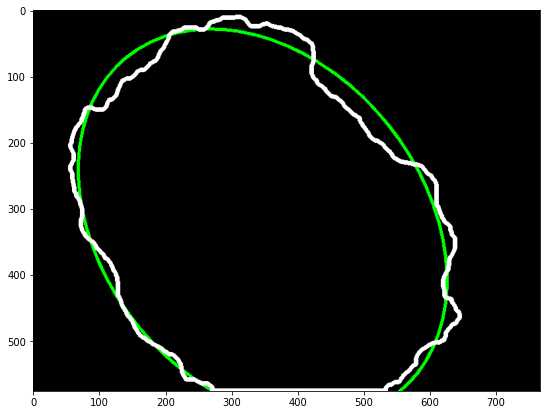

In [53]:
black = np.zeros((h,w,3),np.uint8)
kernel = np.ones((10,10),dtype=np.uint8)
transf = cv2.morphologyEx(mask_bin,cv2.MORPH_CLOSE,kernel)
ret, th1 = cv2.threshold(transf,127,255,0)
contours, hierarchy = cv2.findContours(th1, 1, 2)
contorno_ajuste = cv2.ellipse(black,ellipse_stats,(0,255,0),3)
contorno_ajuste = cv2.drawContours(black, contours, -1, (255,255,255), 5)
plt.imshow(contorno_ajuste,cmap='gray')

In [27]:
# Calculando os pontos pertencentes ao contorno
PQ1x, PQ1y = [], []
PQ2x, PQ2y = [], []
PQ3x, PQ3y = [], []
PQ4x, PQ4y = [], []

for i in range(0,h): # Imagem NXM -> i = N, j = M
  for j in range(0,w):
    if contorno[i,j,1] > 0:
      if j < cx:
        if i < cy: # Segundo Quadrante
          PQ2x.append(j)
          PQ2y.append(i)

        else: # Terceiro Quadrante
          PQ3x.append(j)
          PQ3y.append(i)
          
      else:
        if i < cy: # Primeiro Quadrante
          PQ1x.append(j)
          PQ1y.append(i)

        else: # Quarto Quadrante
          PQ4x.append(j)
          PQ4y.append(i)



PQ1x = np.asarray(PQ1x)
PQ1y = np.asarray(PQ1y)
PQ2x = np.asarray(PQ2x)
PQ2y = np.asarray(PQ2y)
PQ3x = np.asarray(PQ3x)
PQ3y = np.asarray(PQ3y)
PQ4x = np.asarray(PQ4x)
PQ4y = np.asarray(PQ4y)

Px = np.concatenate([PQ1x,PQ2x,PQ3x,PQ4x])
Py = np.concatenate([PQ1y,PQ2y,PQ3y,PQ4y])

(-288.0, 288.0)

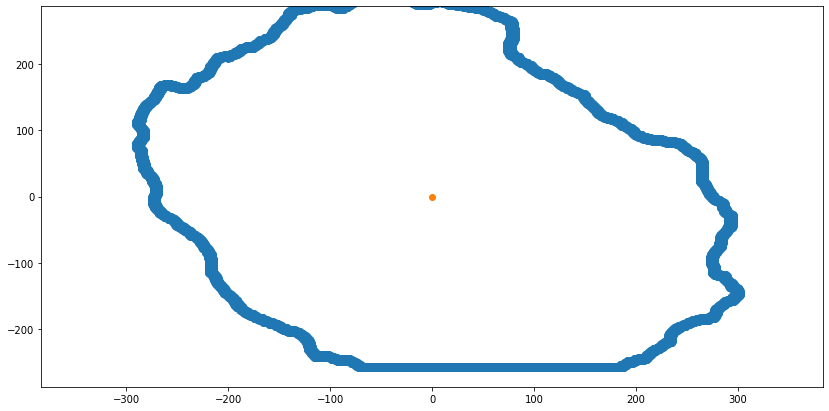

In [28]:
PX_cont = Px-cx
PY_cont = -Py+cy
PX_contcg = Px-x
PY_contcg = -Py+y
plt.scatter(PX_cont,PY_cont)
plt.scatter(0,0)
plt.xlim((-w/2,+w/2))
plt.ylim((-h/2,+h/2))

In [29]:
# Calculando os pontos pertencentes ao contorno
PQ1x, PQ1y = [], []
PQ2x, PQ2y = [], []
PQ3x, PQ3y = [], []
PQ4x, PQ4y = [], []

for i in range(0,h): # Imagem NXM -> i = N, j = M
  for j in range(0,w):
    if ellipse[i,j,1] > 0:
      if j < cx:
        if i < cy: # Segundo Quadrante
          PQ2x.append(j)
          PQ2y.append(i)

        else: # Terceiro Quadrante
          PQ3x.append(j)
          PQ3y.append(i)

      else:
        if i < cy: # Primeiro Quadrante
          PQ1x.append(j)
          PQ1y.append(i)

        else: # Quarto Quadrante
          PQ4x.append(j)
          PQ4y.append(i)



PQ1x = np.asarray(PQ1x)
PQ1y = np.asarray(PQ1y)
PQ2x = np.asarray(PQ2x)
PQ2y = np.asarray(PQ2y)
PQ3x = np.asarray(PQ3x)
PQ3y = np.asarray(PQ3y)
PQ4x = np.asarray(PQ4x)
PQ4y = np.asarray(PQ4y)


Px = np.concatenate([PQ1x,PQ2x,PQ3x,PQ4x])
Py = np.concatenate([PQ1y,PQ2y,PQ3y,PQ4y])

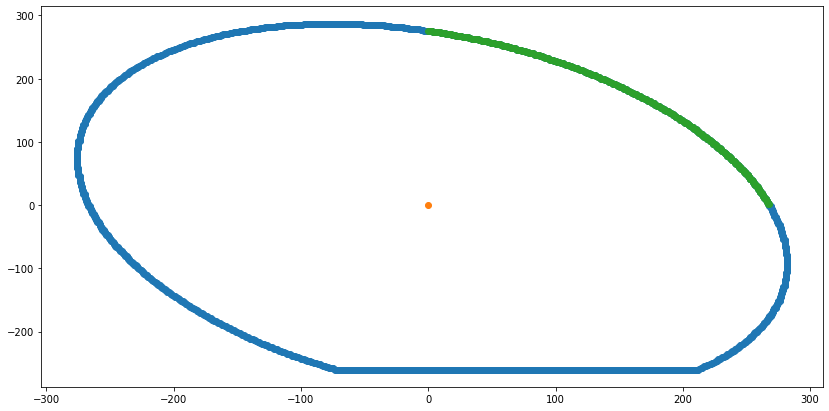

In [30]:
PX_elip = Px-cx
PY_elip = -Py+cy
PX_elipcg = Px-x
PY_elipcg = -Py+y
plt.scatter(PX_elip,PY_elip)
plt.scatter(0,0)
plt.scatter(PQ1x-cx,-PQ1y+cy)

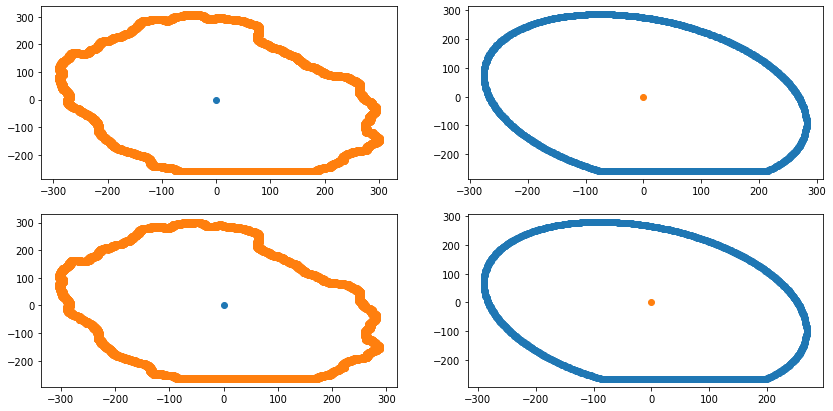

In [31]:
plt.subplot(2,2,1)
plt.scatter(0,0)
plt.scatter(PX_cont,PY_cont)
plt.subplot(2,2,2)
plt.scatter(PX_elip,PY_elip)
plt.scatter(0,0)
plt.subplot(2,2,3)
plt.scatter(0,0)
plt.scatter(PX_contcg,PY_contcg)
plt.subplot(2,2,4)
plt.scatter(PX_elipcg,PY_elipcg)
plt.scatter(0,0)



In [32]:
R_cont = np.sqrt(PX_cont**2+PY_cont**2)
Theta_cont = np.degrees(np.arccos(PX_cont/R_cont))

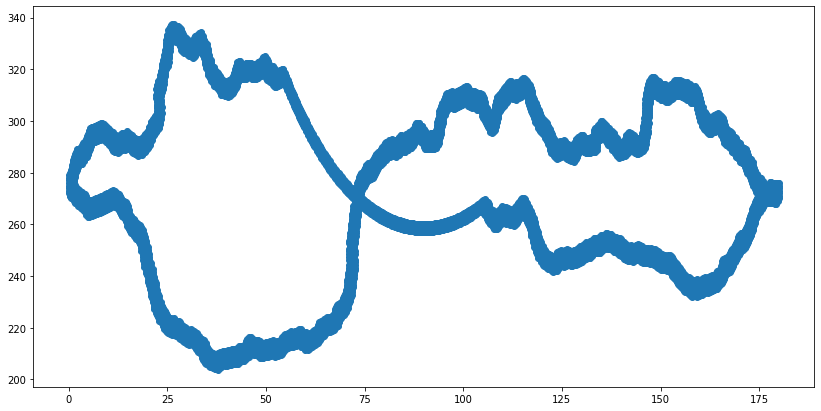

In [33]:
plt.scatter(Theta_cont,R_cont)

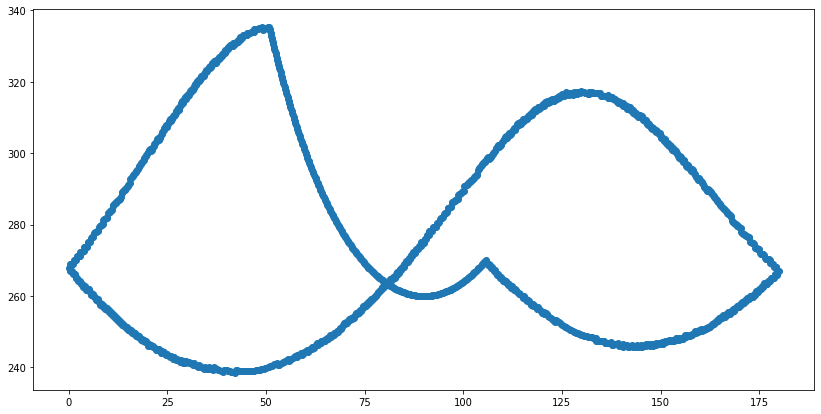

In [34]:
R_elip = np.sqrt(PX_elip**2+PY_elip**2)
Theta_elip = np.degrees(np.arccos(PX_elip/R_elip))
plt.scatter(Theta_elip,R_elip)

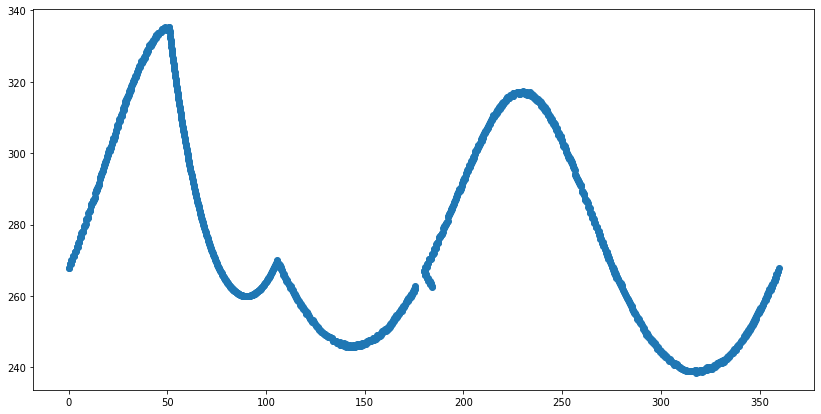

In [35]:
Theta180 = []
Theta360 = []
R180 = []
R360 = []

for i in range(0,round(len(Theta_elip)/2)):
  Theta180.append(Theta_elip[i])
  R180.append(R_elip[i])

for i in range(round(len(Theta_elip)/2),len(Theta_elip)):
  Theta360.append(Theta_elip[i])
  R360.append(R_elip[i])

Theta180_elip = -np.asarray(Theta180)+360
Theta360_elip = np.asarray(Theta360)
R180_elip = np.asarray(R180)
R360_elip =np.asarray(R360)

Theta_elip_final = np.concatenate([Theta180_elip,Theta360_elip])
R_elip_final = np.concatenate([R180_elip, R360_elip])
plt.scatter(Theta_elip_final,R_elip_final)


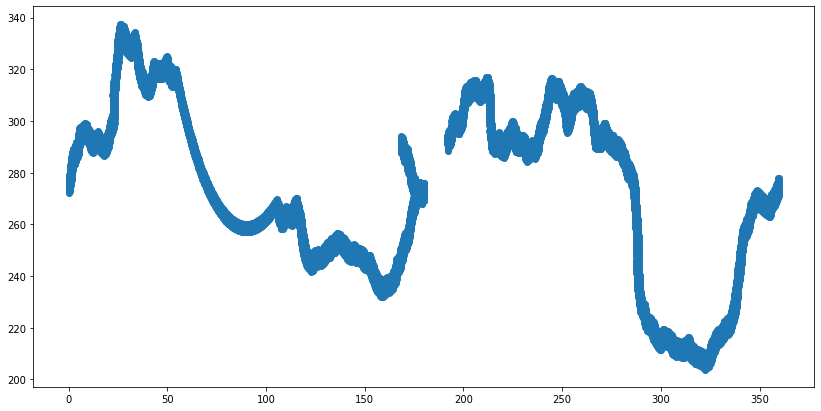

In [36]:
Theta180 = []
Theta360 = []
R180 = []
R360 = []

for i in range(0,round(len(Theta_cont)/2)+2):
  Theta180.append(Theta_cont[i])
  R180.append(R_cont[i])

for i in range(round(len(Theta_cont)/2)-1,len(Theta_cont)):
  Theta360.append(Theta_cont[i])
  R360.append(R_cont[i])

Theta180 = np.asarray(Theta180)
Theta360 = np.asarray(Theta360)
R180 = np.asarray(R180)
R360 = np.asarray(R360)


Theta180_cont = -np.asarray(Theta180)+360
Theta360_cont = np.asarray(Theta360)
R180_cont = np.asarray(R180)
R360_cont =np.asarray(R360)

Theta_cont_final = np.concatenate([Theta180_cont,Theta360_cont])
R_cont_final = np.concatenate([R180_cont,R360_cont])
plt.scatter(Theta_cont_final,R_cont_final)

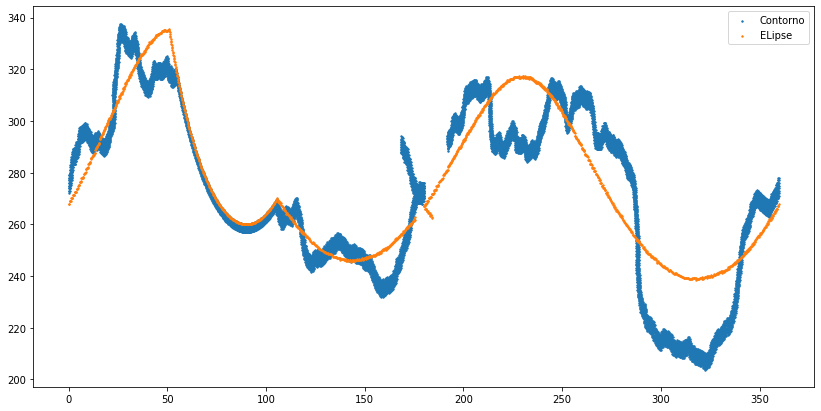

In [37]:
plt.scatter(Theta_cont_final,R_cont_final,s = 2)
plt.scatter(Theta_elip_final,R_elip_final, s = 2)
plt.legend(['Contorno','ELipse'])

In [38]:
def get_int(val):
  Value = val*10**6
  Inteiro = int(Value)
  return Inteiro


In [39]:
Theta = pd.DataFrame(Theta_cont_final, columns = ['Theta'])
R = pd.DataFrame(R_cont_final, columns = ['Raio'])
Total = pd.concat([Theta, R], axis=1)
Total.head()

,Theta,Raio
0,271.149594,299.060195
1,271.341128,299.081929
2,271.532632,299.107004
3,271.724102,299.135421
4,271.915533,299.167177


In [40]:
Theta = pd.DataFrame(Theta_cont_final, columns = ['Theta'])
R = pd.DataFrame(R_cont_final, columns = ['Raio'])
Total = pd.concat([Theta, R], axis=1)
Tec = Total['Theta'].apply(lambda x : get_int(x))
Tec = pd.DataFrame(Tec, columns = ['Theta'])
Total = pd.concat([Tec,R], axis=1)
Total_cont = Total.sort_values(by=['Theta'])
Total_cont['Theta'] = Total_cont['Theta']*10**-6
Total_cont


,Theta,Raio
9135,0.000000,272.000000
9136,0.000000,273.000000
9137,0.000000,274.000000
9138,0.000000,275.000000
9139,0.000000,276.000000
...,...,...
2984,359.790892,274.001825
2985,359.791652,275.001818
2986,359.792407,276.001812
2987,359.793156,277.001805


In [41]:
Theta = pd.DataFrame(Theta_elip_final, columns = ['Theta'])
R = pd.DataFrame(R_elip_final, columns = ['Raio'])
Total = pd.concat([Theta, R], axis=1)
Tec = Total['Theta'].apply(lambda x : get_int(x))
Tec = pd.DataFrame(Tec, columns = ['Theta'])
Total = pd.concat([Tec,R], axis=1)
Total_elip = Total.sort_values(by=['Theta'])
Total_elip['Theta'] = Total_elip['Theta']*10**-6
Total_elip

,Theta,Raio
1136,0.000000,268.000000
1137,0.213789,268.001866
1138,0.425983,269.007435
1139,0.638959,269.016728
1140,0.851919,269.029738
...,...,...
333,358.923138,266.046988
334,359.141700,267.029961
335,359.356254,267.016853
336,359.570826,267.007491


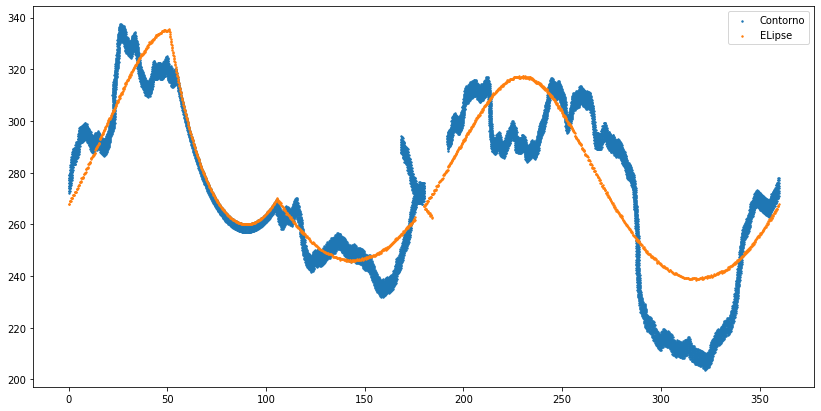

In [42]:
plt.scatter(Total_cont['Theta'],Total_cont['Raio'],s = 2)
plt.scatter(Total_elip['Theta'],Total_elip['Raio'], s = 2)
plt.legend(['Contorno','ELipse'])

In [43]:
from sklearn.metrics import auc

In [44]:
X = Total_elip['Theta']
Y = Total_elip['Raio']
Area_elip = auc(X,Y)
print('A área debaixo da curva Elípse: {}'.format(Area_elip))

A área debaixo da curva Elípse: 98964.3448095636


In [45]:
X = Total_cont['Theta']
Y = Total_cont['Raio']
Area_cont = auc(X,Y)
print('A área debaixo da curva Contorno: {}'.format(Area_cont))

A área debaixo da curva Contorno: 98111.44375247043


In [46]:
Dif_area = abs(Area_cont - Area_elip)
print('A diferença entre as áreas é: {}'.format(Dif_area))

A diferença entre as áreas é: 852.9010570931714


In [47]:
Max_raio_elip = Total_elip['Raio'].max()
Min_raio_elip = Total_elip['Raio'].min()
Amp_elip = Max_raio_elip - Min_raio_elip
Amp_elip

96.8777932837906

In [48]:
Max_raio_cont = Total_cont['Raio'].max()
Min_raio_cont = Total_cont['Raio'].min()
Amp_cont = Max_raio_cont - Min_raio_cont
Amp_cont_abs = Amp_cont/Max_raio_cont

print(Amp_cont_abs)

0.3963389767449939


In [49]:
final_time = time.time() - start_time
print('O código levou {}s'.format(final_time))

O código levou 74.63915848731995s
